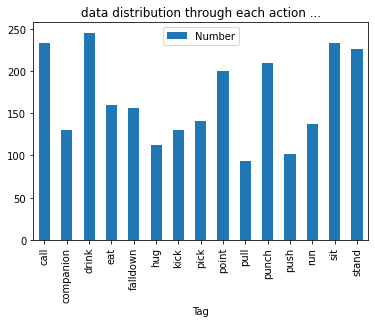

In [10]:
# train and test list and data directory system maker --> s
import os
import pandas as pd
import sklearn.preprocessing
data_path = "data_reduced/"
import random

import math
files_df = pd.DataFrame(columns= ["Tag", "Number"])
number = []
from sklearn.utils.random import sample_without_replacement
# 
from sklearn.utils import shuffle
all_paths = []
ends_with = 0
index = 0
tag =  os.listdir(data_path)
for data in os.listdir(data_path):
    temp_files= os.listdir(data_path+data) # not equally distributed for the training some samples it has been been very up and some it has been very down ..
    number.append(len(os.listdir(data_path+data)))
    sublist = []
    for file in  temp_files:
        if ".mp4" in file and file.split("_")[2] in ["0", "1"]:
            cstring = data+"/"+file[:-4]
            cstring = cstring+" "+str(ends_with)

            sublist.append(cstring)
        index+=1
    all_paths.append(sublist)
    ends_with+=1
files_df["Tag"] = tag
files_df["Number"] = number

files_df.index = files_df.Tag
files_df[["Number"]].plot(kind = "bar", title = "data distribution through each action ...")

In [42]:
print(index)# more than 1163 - files -- get for training and validation --> # there are several files to run 
# channel is the second number so --> to apply that --> there are several works that can  be chosen
summa = 0
new_selected_paths = []
for sublist in all_paths:
    #print(len(sublist))
    current = random.sample(sublist, k = 85)
    print(len(current))
    new_selected_paths.append(current)
    summa+=len(sublist)
print(summa)


2512
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
1867


In [43]:
train_list = []
testlist = []
val_ratio = 0.2
for sublist in new_selected_paths:
    sublist = shuffle(sublist)
    train_len = len(sublist)*(1-val_ratio)
    train_len = math.ceil(train_len)
    train_list.append(sublist[:train_len])
    testlist.append(sublist[train_len:])


In [44]:
#train_list[1]# data gets -|- changed | --> 
for i in train_list:
    print(len(i))

68
68
68
68
68
68
68
68
68
68
68
68
68
68
68


In [45]:
#testlist[1]
newtest_list = []
validation_list = []
for sublist in testlist:
    splitter = int(0.25*len(sublist))
    validation_list.append(sublist[:splitter])
    newtest_list.append(sublist[splitter:])
for i in range(len(newtest_list)):
    print(len(validation_list[i]), len(newtest_list[i]))

4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13
4 13


In [34]:
with open("dataset_list/general_trainlist.txt", "w") as file:
    for current_class in train_list:
        for current in current_class:
            file.write(current+"\n")
        file.write("\n")
with open("dataset_list/general_testlist.txt", "w") as file:
    for current_class in newtest_list:
        for current in current_class:
            file.write(current+"\n")
        file.write("\n")
with open("dataset_list/general_validationlist.txt", "w") as file:
    for current_class in validation_list:
        for current in current_class:
            file.write(current+"\n")
        file.write("\n")
        

In [94]:
channels = []
for subdirs in all_paths:
    channel = []
    for subdir in subdirs:
        channel.append(subdir.split("_")[2])
    channels.append(channel)
    
from collections import Counter
classes = os.listdir(data_path)

index = 0
save_list = []
for channel in channels:
    print(classes[index],  dict(Counter(channel)))
    current_dict =  dict(Counter(channel))
    save_list.append(current_dict)
    index+=1

In [96]:
#channels[4][:10#]

In [100]:
#

In [101]:
#

In [99]:
#import pandas as pd

In [86]:
"""


"""
distri = pd.DataFrame(save_list)
distri.index = classes
distri.to_csv("all_data_angle_distro"+data_path[:-1]+".csv")

In [1]:
len("weight-yp_31cctv_reduced600-0.86-1.00.hdf5")

42

In [2]:
len("weight-yp_31cctv_reduced")

24

In [46]:
everything = []
for  current_list in  [train_list, newtest_list, validation_list]:
    for current in current_list:
        for element in current:
            if element not in everything:
                everything.append(element)
len(everything)

1275